In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, Wave

--2024-05-13 14:52:40--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-05-13 14:52:40--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-05-13 14:52:40 (4.30 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# Упражнение 9.2

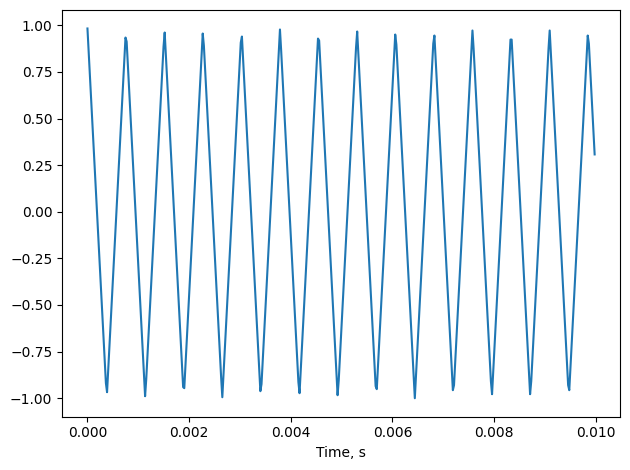

In [2]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=1320).make_wave(duration=0.01, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

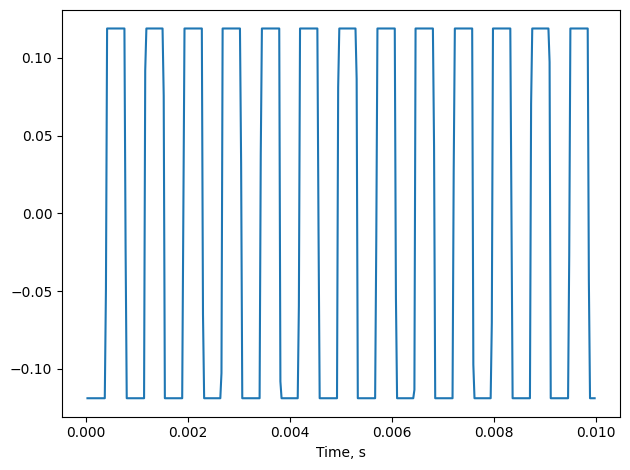

In [3]:
diff_wave = wave.diff()
diff_wave.plot()
decorate(xlabel='Time, s')

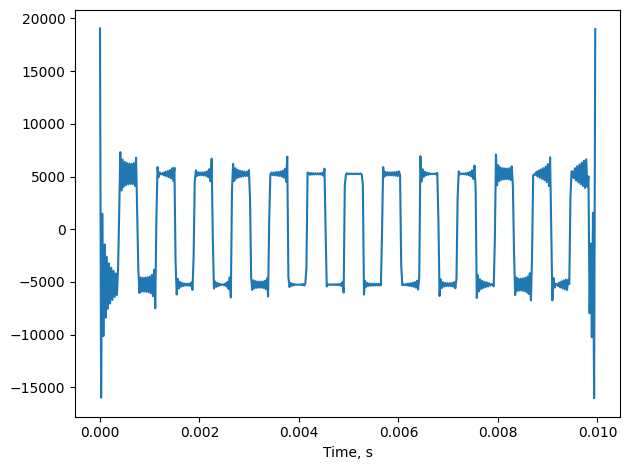

In [4]:
differentiate_wave = wave.make_spectrum().differentiate().make_wave()
differentiate_wave.plot()
decorate(xlabel='Time, s')

# Упражнение 9.3

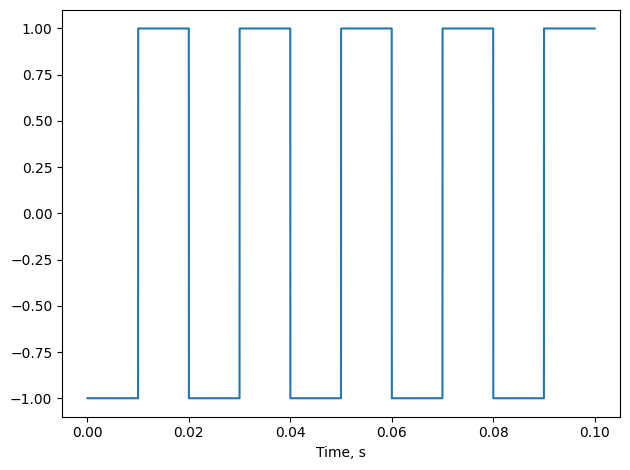

In [5]:
from thinkdsp import SquareSignal

wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

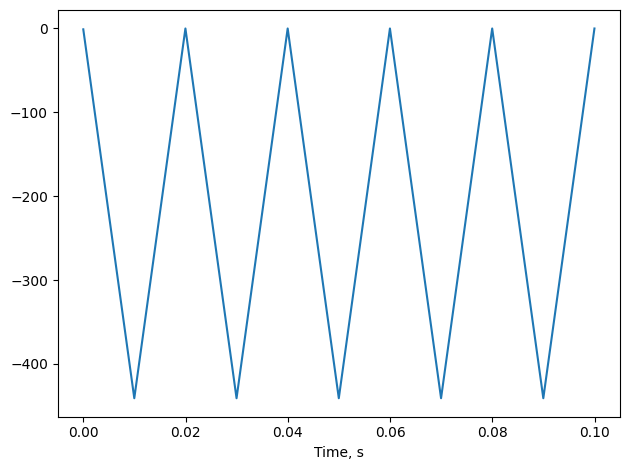

In [6]:
cumsum_wave = wave.cumsum()
cumsum_wave.plot()
decorate(xlabel='Time, s')

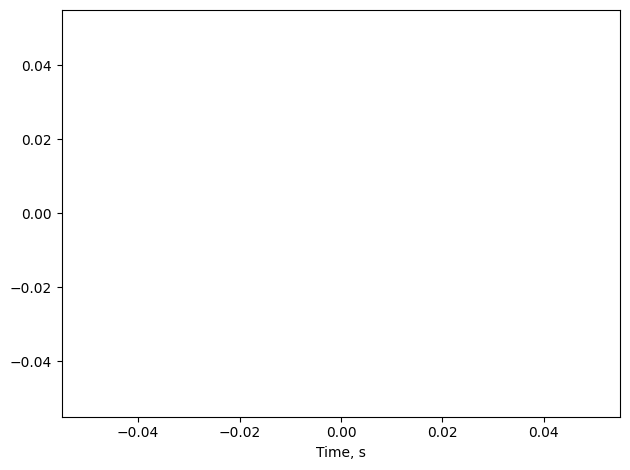

In [7]:
int_wave = wave.make_spectrum().integrate().make_wave()
int_wave.plot()
decorate(xlabel='Time, s')

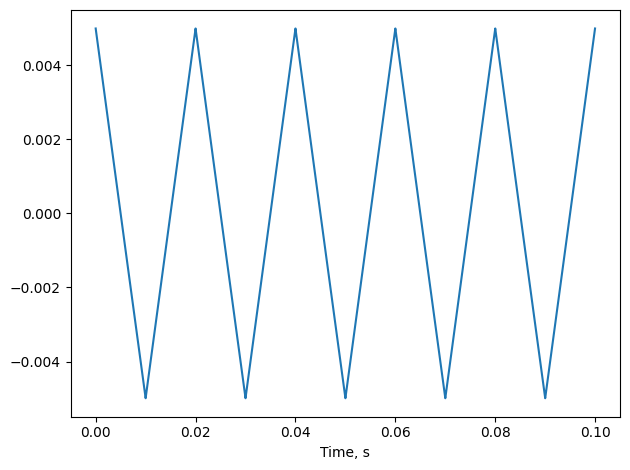

In [8]:
int_spec = wave.make_spectrum().integrate()
int_spec.hs[0] = 0
int_wave = int_spec.make_wave()
int_wave.plot()
decorate(xlabel='Time, s')

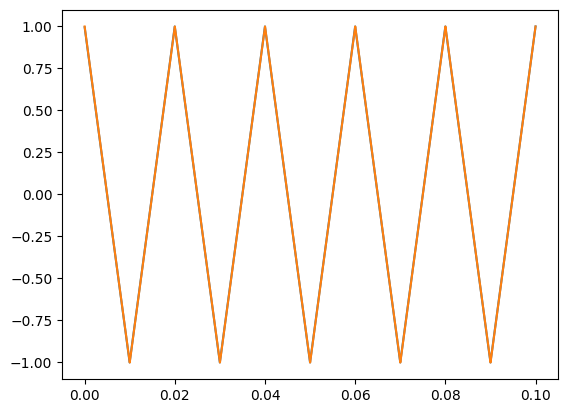

In [9]:
cumsum_wave.unbias()
cumsum_wave.normalize()
int_wave.normalize()
cumsum_wave.plot()
int_wave.plot()

# Упражнение 9.4

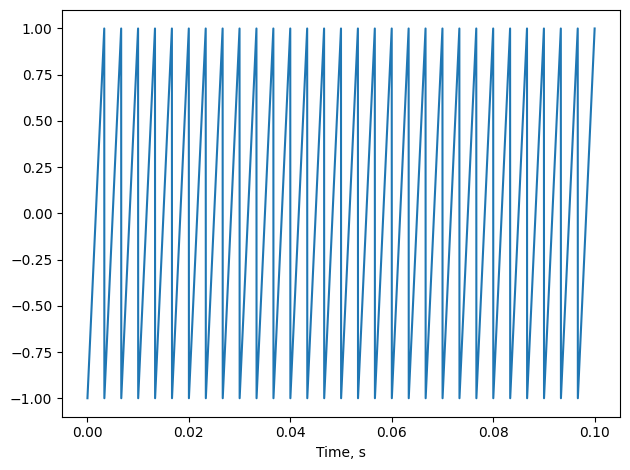

In [13]:
from thinkdsp import SawtoothSignal

wave = SawtoothSignal(freq=300).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

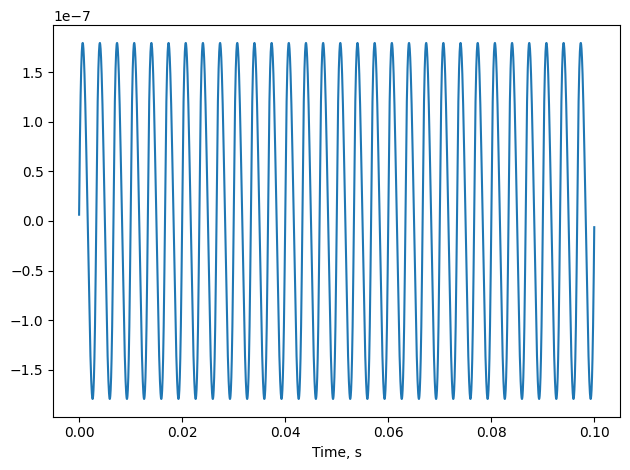

In [14]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0

wave1 = spectrum.make_wave()
wave1.plot()
decorate(xlabel='Time, s')

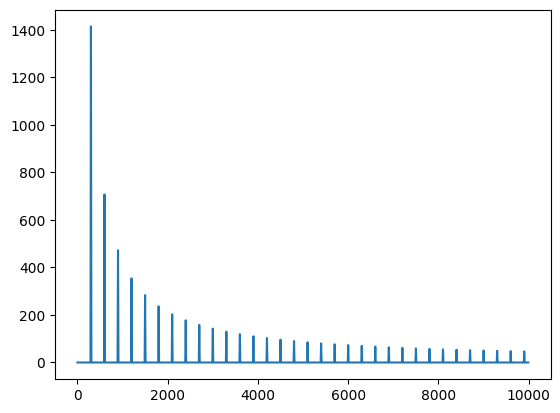

In [18]:
wave.make_spectrum().plot(high=10000)

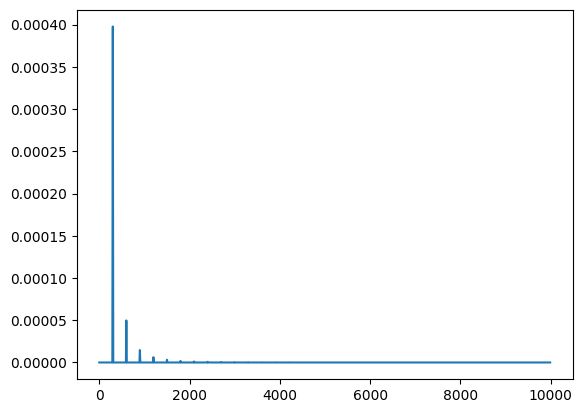

In [19]:
wave1.make_spectrum().plot(high=10000)

# Упражнение 9.5

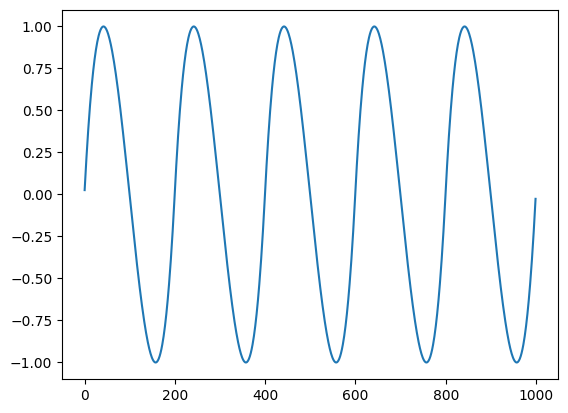

In [26]:
from thinkdsp import CubicSignal

wave = CubicSignal(freq=0.005).make_wave(duration=1000, framerate=1)
wave.plot()

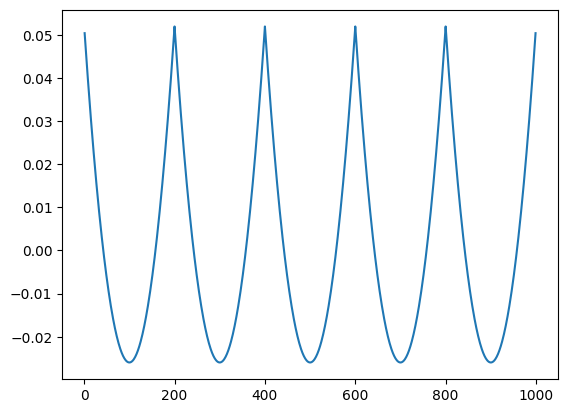

In [27]:
d1_wave = wave.diff()
d1_wave.plot()

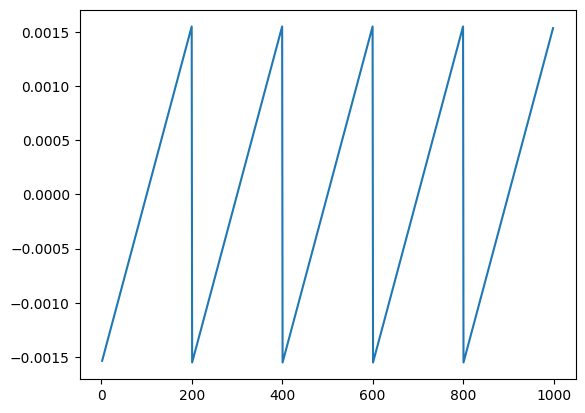

In [28]:
d2_wave = d1_wave.diff()
d2_wave.plot()

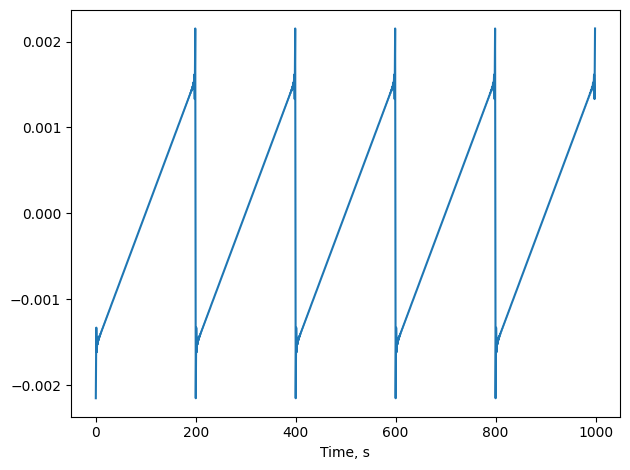

In [29]:
spectrum = wave.make_spectrum().differentiate().differentiate()
di_wave = spectrum.make_wave()
di_wave.plot()
decorate(xlabel='Time, s')

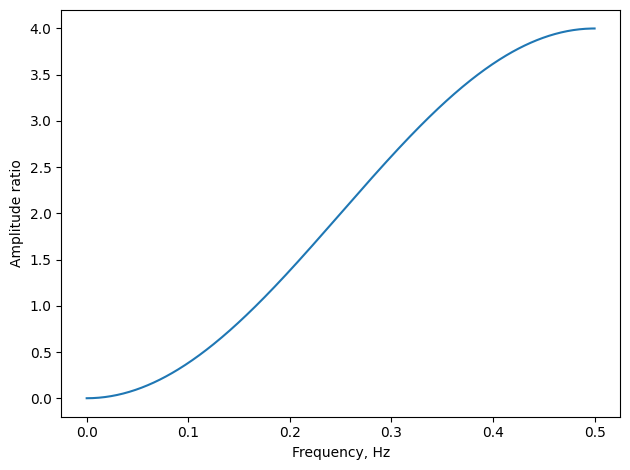

In [30]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

decorate(xlabel='Frequency, Hz',
                 ylabel='Amplitude ratio')

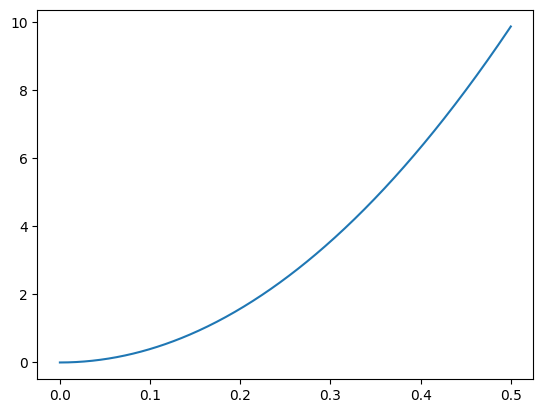

In [31]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs)**2
deriv_filter.plot()

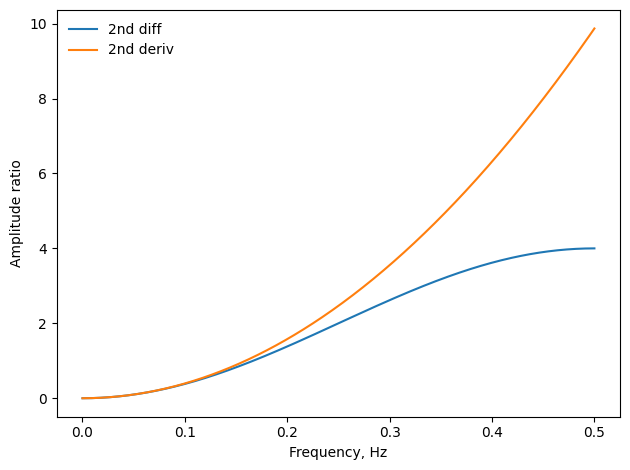

In [32]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency, Hz',
                 ylabel='Amplitude ratio')